**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Fall 2020</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: Jan 03, 2021 23:59 (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks. You should implement programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries inclueded in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions, please contact "ilaydabeyreli@gmail.com" or "ilayda.beyreli@bilkent.edu.tr".
    </li>

</ul>

## Environment Setup

This homewrok is prepeared by using Google CoLab which already has required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "pacakge_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


##Question 1 [12 pts.]

Answer the given questions with **at most a sentence**.

  >a) What is one reason not to use the same data for both your training set and your testing set?<br>
  To prevent overfitting.

  >b) Why is it important for machine learning algorithms to have access to high-quality(large and accurate enough) data ?<br>
  Algorithms would not face with any unexpected inputs by training with large data and they would make accurate predictions with accurate data.

  >c) What is the main motivation for using activation functions in artificial neural networks (ANNs)?<br>
  Activation functions performs non-linearity transformation on the input to get better results on ANNs.

  >d) The activations for class A, B and C before softmax were 12, 7 and 4. What would be the softmax values for class A and class B?<br>
  A = e^(12) / (e^(12) + e^(7) + e^(4)), B = e^(7) / (e^(12) + e^(7) + e^(4))

  >e) What does it mean to underfit your data model?<br>
  It means, machine learning algorithm has learned nothing.

  >f) Consider you have a 14 class classification problem. What would be the probability of random guess?<br>
  1 / 14




##Question 2 [88 pts.]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify cats according to their breeds by using simple machine learning algorithms developed for CV problems on cat images.

Your dataset consist of cat images from 13 breeds. Images of each breed is stored under separate folders in the compressed file given to you.  The dataset has been processed in such a way that each class has approximately 1900 samples.

Download the dataset from the following link:
<br>
https://drive.google.com/.....
<br>

Libraries that are required in this question is given in the following code cell.

In [2]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import os

# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.

### Data Loader [8 pts.]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "CatsDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, 
<b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of CatsDataset, should be retrieved using the "get_dataset" function. Since this data loader will be called to get the input for different models, your function should work in a least two modes:
1. To be compatible with MLP, you need to resize the image to 64x64x3 to have consistent input size for all images. Then, you should convert your image to grayscale and flatten it into a vector. Note that the pixel values also needs to be normalized to [0,1] range.
<br>
2. To be compatible with CNN, you need to resize the image to 64x64x3 to have consistent input size for all images. Note that, you **should not** flatten the image or convert it to grayscale in this mode, i.e. all channels of the images should be included and each image should be stored as a matrix.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [3]:
class CatsDataset(Dataset):
    # TODO:
    # Define constructor for SVHNDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, **kwargs): # you are free to change parameters
      self.data = kwargs["data"]
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
       return len(self.data)

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
      _x = self.data[index][0]      
      _y = self.data[index][1]
      return _x, _y


In [4]:
def get_dataset(root, mode):
    img_with_label = []
    classes = os.listdir(root)
    class_sequence = []
    for i in range(len(classes)):
#         class_sequence.append(classes[i])
        for img_file in os.listdir(root+"/"+classes[i]):
          if mode == 2:
              img = (Image.open(root+"/"+classes[i]+"/"+img_file)).resize((64,64))                
          else:
              img = (Image.open(root+"/"+classes[i]+"/"+img_file).convert('L')).resize((64,64))
              img = np.array(img).reshape(1,64*64)                
          img_with_label.append(((np.array(img)/255),i))
    catSet = CatsDataset(data = img_with_label)
    dataset = torch.utils.data.random_split(catSet , [int(len(catSet) * 0.7), int(len(catSet) * 0.1) , len(catSet) - int(len(catSet) * 0.7) - int(len(catSet) * 0.1)])
    train_dataset = dataset[0]
    val_dataset = dataset[1]
    test_dataset = dataset[2] 
    # TODO: 
    # Read dataset files
    # Resize images as 64x64 so that you have consistent data. You can use img.resize((64,64)) from PIL.Image.
    # Construct training, validation and test sets
    # Normalize datasets
#     print(class_sequence)
    return train_dataset, val_dataset, test_dataset

In [27]:
get_dataset('data', 1)

['American Shorthair', 'Bengal', 'Calico', 'Dilute Calico', 'Dilute Tortoiseshell', 'Domestic Medium Hair', 'Manx', 'Persian', 'Ragdoll', 'Siamese', 'Tabby', 'Torbie', 'Tuxedo']


(<torch.utils.data.dataset.Subset at 0x2479157d520>,
 <torch.utils.data.dataset.Subset at 0x24764c5cd60>)

###Model Implementations [10 pts.]

#### Multi Layer Perceptron [5 pts.]
Now, implement your three layer neural network. (Input+hidden1+hidden2) FNet class will represent your neural network. The first hidden layer will contain 2048 neurons, and the second will have 1024 neurons. You will decide the number of input and output neurons. Use ReLU as your hidden layer activation function. You need to pick a proper activation function for the output layer.

In [5]:
class FNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): 
        super().__init__()       
        self.input_fc = nn.Linear(4096, 2048)
        self.hidden_fc = nn.Linear(2048, 1024)
        self.output_fc = nn.Linear(1024, 13)
        
    # you can add any additional parameters you want 
    # TODO:
    # You should create your neural network here
     
    def forward(self, X):
        x = X
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        h_1 = F.relu(self.input_fc(x))
        h_2 = F.relu(self.hidden_fc(h_1))
        y_pred = self.output_fc(h_2)
        return y_pred
    # you can add any additional parameters you want
    # TODO:
    # Forward propagation implementation should be here

#### Convolutional Neural Network [5 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 4 layers of convolution: 
<ul>
    <li>(1) 8 filters with size of 3 x 3 with stride 1 and no padding, (2) ReLU </li>
    <li>(3) 16 filters with size of 3 x 3 with stride 1 and no padding, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 32 filters with size of 5 x 5 with stride 1 and padding 1, (7) ReLU and (8) MaxPool 2 x 2 </li> 
    <li>(9) 32 filters with size of 5 x 5 with stride 1 and padding 1, (10) ReLU and (11) MaxPool 2 x 2 </li> 
</ul>

As the classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [6]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs):
      super().__init__()
        
      self.layer1 = nn.Sequential(
          nn.Conv2d(3,8,kernel_size=3, padding=0,stride=1),
          nn.ReLU(),
      )
      
      self.layer2 = nn.Sequential(
          nn.Conv2d(8,16, kernel_size=3, padding=0, stride=1),
          nn.ReLU(),
          nn.MaxPool2d(2)
          )
      
      self.layer3 = nn.Sequential(
          nn.Conv2d(16,32, kernel_size=5, padding=1, stride=1),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )

      self.layer4 = nn.Sequential(
          nn.Conv2d(32,32, kernel_size=5, padding=1, stride=1),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      
      
      self.fc1 = nn.Linear(6*6*32,13)
    # you can add any additional parameters you want 
    # TODO:
    # You should create your neural network here
     
    def forward(self, X):
        x = X
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.reshape(-1, 32*6*6)
        out = self.fc1(out)
        return out
    # you can add any additional parameters you want
    # TODO:
    # Forward propagation implementation should be here

###Stochastic Gradient Descent [35 pts.]

####Training with SGD [20 pts.]

Train both models up to 700 epochs with properly processed inputs, i.e. call your "get_dataset" function in mode "1" for MLP and mode "2" for CNN. Use SGD as your optimizer. Tune your learning rate, weight decay. Take momentum as $0$ Save your best models, i.e. MLP and CNN models with highest performance, as "best_mlp_sgd.pth" and "best_cnn_sgd.pth". The best model decision is up to you. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures for each model:
1. training loss and validation loss vs. epoch
2. validation acuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

In [ ]:
train_dataset, val_dataset, test_dataset = get_dataset('data', 1)

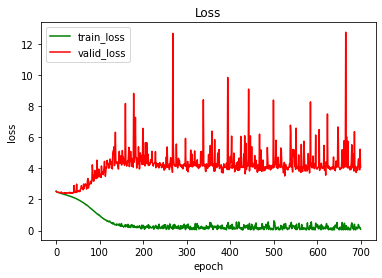

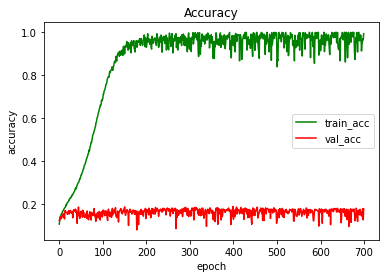

In [8]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700
train_batch = 32
test_batch = 32
learning_rate = 0.01

use_gpu = torch.cuda.is_available()

train_loader_mlp = DataLoader(dataset = train_dataset, batch_size=train_batch, shuffle=True )
test_loader_mlp = DataLoader(dataset = test_dataset, batch_size=train_batch, shuffle=True)
val_loader_mlp = DataLoader(dataset = val_dataset, batch_size=train_batch, shuffle=True)

# initialize your network
model = FNet().to('cuda')

# define your loss function
criterion = nn.CrossEntropyLoss()
    
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=10e-04, momentum=0) # you can play with  weight_decay as well
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
val_acc = []
valid_loss = []
train_acc = []
train_loss = []
val_acc_max = 0
for epoch in range(max_epoch):
    model=model.train()
    running_loss = 0.0
    epoch_accuracy=0
    epoch_loss =0
    for data in train_loader_mlp:
        inputs, labels = data
        inputs = inputs.to('cuda',dtype=torch.float32)
        labels = labels.to('cuda',dtype=torch.long)

        optimizer.zero_grad()

        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        acc = ((outputs.argmax(dim=1) == labels).float().mean())
        epoch_accuracy += acc/len(train_loader_mlp)
        epoch_loss += loss/len(train_loader_mlp)
#     print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
    train_acc.append(epoch_accuracy)
    train_loss.append(epoch_loss)
#    Validation
    model = model.eval()
    with torch.no_grad():
            epoch_val_accuracy=0
            epoch_val_loss =0
            for data in val_loader_mlp:
                data, label = data
                data = data.to('cuda',dtype=torch.float32)
                label = label.to('cuda',dtype=torch.long)

                val_output = model(data.float())
                val_loss = criterion(val_output,label)

                acc = ((val_output.argmax(dim=1) == label).float().mean())
                epoch_val_accuracy += acc/ len(val_loader_mlp)
                epoch_val_loss += val_loss/ len(val_loader_mlp)

            val_acc.append(epoch_val_accuracy)
            valid_loss.append(epoch_val_loss)
            if epoch_val_accuracy > val_acc_max:
                torch.save(model, 'best_mlp_sgd.pth')
                val_acc_max = epoch_val_accuracy
            
plt.plot(train_loss, color='green')
plt.plot(valid_loss, color='red')
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'valid_loss'])
plt.show()

plt.plot(train_acc, color='green')
plt.plot(val_acc, color='red')
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'val_acc'])
plt.show()

In [7]:
train_dataset, val_dataset, test_dataset = get_dataset('data', 2)

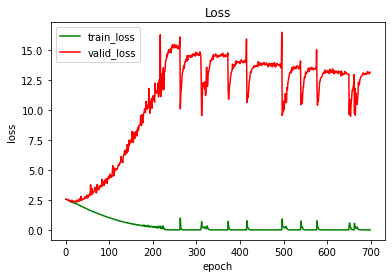

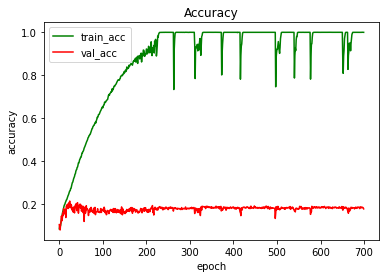

In [8]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700
train_batch = 64
test_batch = 64
learning_rate = 0.01

use_gpu = torch.cuda.is_available()

train_loader_cnn = DataLoader(dataset = train_dataset, batch_size=train_batch, shuffle=True )
test_loader_cnn = DataLoader(dataset = test_dataset, batch_size=train_batch, shuffle=True)
val_loader_cnn = DataLoader(dataset = val_dataset, batch_size=train_batch, shuffle=True)

# initialize your network
model = ConvNet().to('cuda')

# define your loss function
criterion = nn.CrossEntropyLoss()
    
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=5e-04, momentum=0) # you can play with  weight_decay as well
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
val_acc = []
valid_loss = []
train_acc = []
train_loss = []
val_acc_max = 0
for epoch in range(max_epoch):
    model=model.train()
    running_loss = 0.0
    epoch_accuracy=0
    epoch_loss =0
    for data in train_loader_cnn:
        inputs, labels = data
        inputs = inputs.to('cuda',dtype=torch.float32)
        labels = labels.to('cuda',dtype=torch.long)

        optimizer.zero_grad()

        inputs = inputs.permute(0, 3, 1, 2)
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        acc = ((outputs.argmax(dim=1) == labels).float().mean())
        epoch_accuracy += acc/len(train_loader_cnn)
        epoch_loss += loss/len(train_loader_cnn)
    train_acc.append(epoch_accuracy)
    train_loss.append(epoch_loss)
#    Validation
    model = model.eval()
    with torch.no_grad():
            epoch_val_accuracy=0
            epoch_val_loss =0
            for data in val_loader_cnn:
                data, label = data
                data = data.to('cuda',dtype=torch.float32)
                label = label.to('cuda',dtype=torch.long)

                data = data.permute(0, 3, 1, 2)
                val_output = model(data.float())
                val_loss = criterion(val_output,label)


                acc = ((val_output.argmax(dim=1) == label).float().mean())
                epoch_val_accuracy += acc/ len(val_loader_cnn)
                epoch_val_loss += val_loss/ len(val_loader_cnn)
            val_acc.append(epoch_val_accuracy)
            valid_loss.append(epoch_val_loss)
            if epoch_val_accuracy > val_acc_max:
                torch.save(model, 'best_cnn_sgd.pth')
                val_acc_max = epoch_val_accuracy
            
plt.plot(train_loss, color='green')
plt.plot(valid_loss, color='red')
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'valid_loss'])
plt.show()

plt.plot(train_acc, color='green')
plt.plot(val_acc, color='red')
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'val_acc'])
plt.show()

####Test with SGD [15 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **models**. Which one is more preferable? Why?

Mean Loss: 4.2052178382873535 
Mean Acc: 0.17219065656565669 
Mean Macro Precision: 0.2556575278977876 
Mean Macro Recall: 0.22828061188450788 
Mean Macro F1 Score: 0.14053552637468722


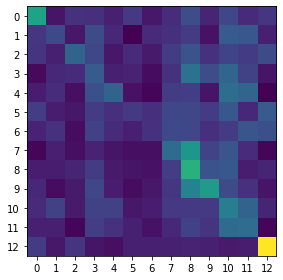

In [11]:
# Test MLP
# load best model
best_path = 'best_mlp_sgd.pth'
model = torch.load(best_path)

# evaluate on test set
model = model.eval()

test_loss_arr = []
with torch.no_grad():
    epoch_test_loss = 0
    acc = 0
    pre = 0
    recall = 0
    f1 = 0
    conf_matrix = np.zeros((13,13))
#   iterate over test batches
    for loaded_data in test_loader_mlp:
        input_data, label = loaded_data
        input_data = input_data.to('cuda',dtype=torch.float32)
        label = label.to('cuda',dtype=torch.long)

        test_output = model(input_data.float())
        test_loss = criterion(test_output,label)
        
        epoch_test_loss += test_loss/ len(test_loader_mlp)
        test_output = (test_output.argmax(dim=1)).long()
        label = np.array(label.cpu())
        test_output = np.array(test_output.cpu())
        #   get confusion matrix
        if(confusion_matrix(label, test_output).shape==(13,13)):
            conf_matrix += confusion_matrix(label, test_output) / len(test_loader_mlp)
#         conf_matrix.append(confusion_matrix(label, test_output))
        #   calculate accuracy
        acc += accuracy_score(label, test_output) / len(test_loader_mlp)
        #   calculate precision
        pre += precision_score(label, test_output, average='macro', zero_division=1) / len(test_loader_mlp)
        #   calculate recall
        recall += recall_score(label, test_output, average='macro', zero_division=1) / len(test_loader_mlp)
        #   calculate F1 score
        f1 += f1_score(label, test_output, average='macro') / len(test_loader_mlp)
    
test_loss_arr.append(epoch_test_loss)
test_loss_arr = np.array(test_loss_arr, dtype='float')
losses = np.mean(test_loss_arr)


# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.show()

Mean Loss: 2.3535845279693604 
Mean Acc: 0.2097174928729806 
Mean Macro Precision: 0.305111470395451 
Mean Macro Recall: 0.2156219321803737 
Mean Macro F1 Score: 0.16361713813748174


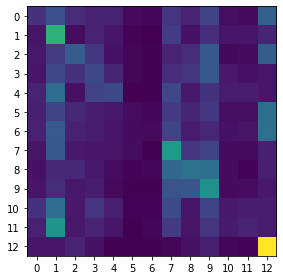

In [9]:
# Test CNN
# load best model
best_path = 'best_cnn_sgd.pth'
model = torch.load(best_path)

# evaluate on test set
model = model.eval()

test_loss_arr = []
with torch.no_grad():
    epoch_test_loss = 0
    acc = 0
    pre = 0
    recall = 0
    f1 = 0
    conf_matrix = np.zeros((13,13))
#   iterate over test batches
    for loaded_data in test_loader_cnn:
        input_data, label = loaded_data
        input_data = input_data.to('cuda',dtype=torch.float32)
        label = label.to('cuda',dtype=torch.long)

        input_data = input_data.permute(0, 3, 1, 2)
        test_output = model(input_data.float())
        test_loss = criterion(test_output,label)
        
        epoch_test_loss += test_loss/ len(test_loader_cnn)
        test_output = (test_output.argmax(dim=1)).long()
        label = np.array(label.cpu())
        test_output = np.array(test_output.cpu())
        #   get confusion matrix
        if(confusion_matrix(label, test_output).shape==(13,13)):
            conf_matrix += confusion_matrix(label, test_output) / len(test_loader_cnn)
#         conf_matrix.append(confusion_matrix(label, test_output))
        #   calculate accuracy
        acc += accuracy_score(label, test_output) / len(test_loader_cnn)
        #   calculate precision
        pre += precision_score(label, test_output, average='macro', zero_division=1) / len(test_loader_cnn)
        #   calculate recall
        recall += recall_score(label, test_output, average='macro', zero_division=1) / len(test_loader_cnn)
        #   calculate F1 score
        f1 += f1_score(label, test_output, average='macro') / len(test_loader_cnn)

test_loss_arr.append(epoch_test_loss)
test_loss_arr = np.array(test_loss_arr, dtype='float')
losses = np.mean(test_loss_arr)

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.show()

Performance metric that I chose to save .pth documents is accuracy but precision would be better since we have lots of false positives. I realized it lately so I could not re-rained the models for the precision metric. Therefore, saving best models according to the performance metric, precision would give better results than performance metric accuracy. However, since there is same number of each cat breed and data is shuffled before the training, accuracy would be a good metric to pick the best model.
By looking at the accuracy and loss plots of the training and validation sets, it could be said that CNN model has higher accuracy than MLP model for validation. However, these plots also shows that models are over fitted because both models training accuracy is approximately 1 but validation accuracy is approximately 0.2 for CNN and 0.15 for MLP model. For the test results of the saved .pth document, it could be said that CNN gave better results than MLP model for all metrics expect recall but the difference is small. By looking at the confusion matrixes, MLP learned “0, 8, 9, 10, 11, 12” well and CNN learned “1, 7, 8, 9, 12” well.

###Adam Optimizer [35 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [20 pts.]

Train both models up to 700 epochs with properly processed inputs, i.e. call your "get_dataset" function in mode "1" for MLP and mode "2" for CNN. This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best models, i.e. MLP and CNN models with highest performance, as "best_mlp_adam.pth" and "best_cnn_adam.pth". The best model decision is up to you. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures for each model:
1. training loss and validation loss vs. epoch
2. validation acuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

In [10]:
train_dataset, val_dataset, test_dataset = get_dataset('data', 1)

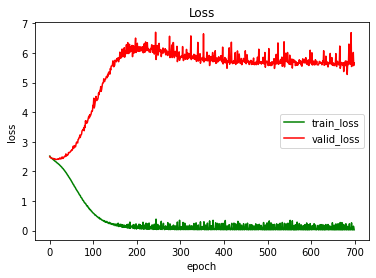

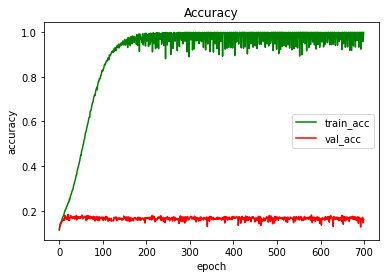

In [16]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700
train_batch = 64
test_batch = 64
learning_rate = 0.0001

use_gpu = torch.cuda.is_available()

train_loader_mlp = DataLoader(dataset = train_dataset, batch_size=train_batch, shuffle=True )
test_loader_mlp = DataLoader(dataset = test_dataset, batch_size=train_batch, shuffle=True)
val_loader_mlp = DataLoader(dataset = val_dataset, batch_size=train_batch, shuffle=True)

# initialize your network
model = FNet().to('cuda')

# define your loss function
criterion = nn.CrossEntropyLoss()
    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
    
val_acc = []
valid_loss = []
train_acc = []
train_loss = []
val_acc_max = 0
for epoch in range(max_epoch):
    model=model.train()
    running_loss = 0.0
    epoch_accuracy=0
    epoch_loss =0
    for data in train_loader_mlp:
        inputs, labels = data
        inputs = inputs.to('cuda',dtype=torch.float32)
        labels = labels.to('cuda',dtype=torch.long)

        optimizer.zero_grad()

        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        acc = ((outputs.argmax(dim=1) == labels).float().mean())
        epoch_accuracy += acc/len(train_loader_mlp)
        epoch_loss += loss/len(train_loader_mlp)
    train_acc.append(epoch_accuracy)
    train_loss.append(epoch_loss)
#    Validation
    model = model.eval()
    with torch.no_grad():
            epoch_val_accuracy=0
            epoch_val_loss =0
            for data in val_loader_mlp:
                data, label = data
                data = data.to('cuda',dtype=torch.float32)
                label = label.to('cuda',dtype=torch.long)

                val_output = model(data.float())
                val_loss = criterion(val_output,label)

                acc = ((val_output.argmax(dim=1) == label).float().mean())
                epoch_val_accuracy += acc/ len(val_loader_mlp)
                epoch_val_loss += val_loss/ len(val_loader_mlp)

            val_acc.append(epoch_val_accuracy)
            valid_loss.append(epoch_val_loss)
            if epoch_val_accuracy > val_acc_max:
                torch.save(model, 'best_mlp_adam.pth')
                val_acc_max = epoch_val_accuracy
            
plt.plot(train_loss, color='green')
plt.plot(valid_loss, color='red')
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'valid_loss'])
plt.show()

plt.plot(train_acc, color='green')
plt.plot(val_acc, color='red')
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'val_acc'])
plt.show()

In [11]:
train_dataset, val_dataset, test_dataset = get_dataset('data', 2)

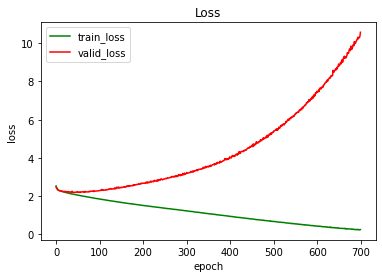

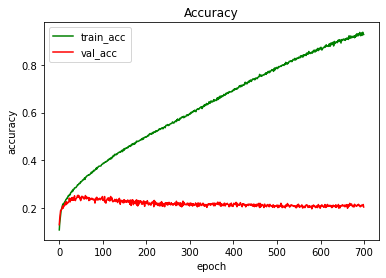

In [12]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700
train_batch = 64
test_batch = 64
learning_rate = 0.0001

use_gpu = torch.cuda.is_available()

train_loader_cnn = DataLoader(dataset = train_dataset, batch_size=train_batch, shuffle=True )
test_loader_cnn = DataLoader(dataset = test_dataset, batch_size=train_batch, shuffle=True)
val_loader_cnn = DataLoader(dataset = val_dataset, batch_size=train_batch, shuffle=True)
# initialize your network
model = ConvNet().to('cuda')

# define your loss function
criterion = nn.CrossEntropyLoss()
    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
    
val_acc = []
valid_loss = []
train_acc = []
train_loss = []
val_acc_max = 0
for epoch in range(max_epoch):
    model=model.train()
    running_loss = 0.0
    epoch_accuracy=0
    epoch_loss =0
    for data in train_loader_cnn:
        inputs, labels = data
        inputs = inputs.to('cuda',dtype=torch.float32)
        labels = labels.to('cuda',dtype=torch.long)

        optimizer.zero_grad()

        inputs = inputs.permute(0, 3, 1, 2)
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        acc = ((outputs.argmax(dim=1) == labels).float().mean())
        epoch_accuracy += acc/len(train_loader_cnn)
        epoch_loss += loss/len(train_loader_cnn)
#     print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
    train_acc.append(epoch_accuracy)
    train_loss.append(epoch_loss)
#    Validation
    model = model.eval()
    with torch.no_grad():
            epoch_val_accuracy=0
            epoch_val_loss =0
            for data in val_loader_cnn:
                data, label = data
                data = data.to('cuda',dtype=torch.float32)
                label = label.to('cuda',dtype=torch.long)

                data = data.permute(0, 3, 1, 2)
                val_output = model(data.float())
                val_loss = criterion(val_output,label)

                acc = ((val_output.argmax(dim=1) == label).float().mean())
                epoch_val_accuracy += acc/ len(val_loader_cnn)
                epoch_val_loss += val_loss/ len(val_loader_cnn)

            val_acc.append(epoch_val_accuracy)
            valid_loss.append(epoch_val_loss)
            if epoch_val_accuracy > val_acc_max:
                torch.save(model, 'best_cnn_adam.pth')
                val_acc_max = epoch_val_accuracy
            
plt.plot(train_loss, color='green')
plt.plot(valid_loss, color='red')
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'valid_loss'])
plt.show()

plt.plot(train_acc, color='green')
plt.plot(val_acc, color='red')
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'val_acc'])
plt.show()

####Test with ADAM [15 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?

Mean Loss: 2.4014384746551514 
Mean Acc: 0.1809025578080455 
Mean Macro Precision: 0.2621493694604929 
Mean Macro Recall: 0.1918354206565995 
Mean Macro F1 Score: 0.15247939529834925


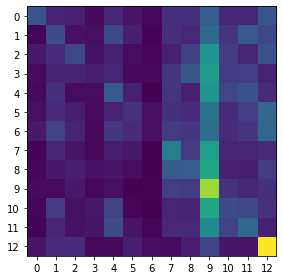

In [19]:
# Test MLP
# load best model
best_path = 'best_mlp_adam.pth'
model = torch.load(best_path)

# evaluate on test set
model = model.eval()

test_loss_arr = []
with torch.no_grad():
    epoch_test_loss = 0
    acc = 0
    pre = 0
    recall = 0
    f1 = 0
    conf_matrix = np.zeros((13,13))
#   iterate over test batches
    for loaded_data in test_loader_mlp:
        input_data, label = loaded_data
        input_data = input_data.to('cuda',dtype=torch.float32)
        label = label.to('cuda',dtype=torch.long)

        test_output = model(input_data.float())
        test_loss = criterion(test_output,label)
        
        epoch_test_loss += test_loss/ len(test_loader_mlp)
        test_output = (test_output.argmax(dim=1)).long()
        label = np.array(label.cpu())
        test_output = np.array(test_output.cpu())
        #   get confusion matrix
        if(confusion_matrix(label, test_output).shape==(13,13)):
            conf_matrix += confusion_matrix(label, test_output) / len(test_loader_mlp)
#         conf_matrix.append(confusion_matrix(label, test_output))
        #   calculate accuracy
        acc += accuracy_score(label, test_output) / len(test_loader_mlp)
        #   calculate precision
        pre += precision_score(label, test_output, average='macro', zero_division=1) / len(test_loader_mlp)
        #   calculate recall
        recall += recall_score(label, test_output, average='macro', zero_division=1) / len(test_loader_mlp)
        #   calculate F1 score
        f1 += f1_score(label, test_output, average='macro') / len(test_loader_mlp)
    
test_loss_arr.append(epoch_test_loss)
test_loss_arr = np.array(test_loss_arr, dtype='float')
losses = np.mean(test_loss_arr)


# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.show()

Mean Loss: 2.206914186477661 
Mean Acc: 0.24876761957554647 
Mean Macro Precision: 0.26115755983388345 
Mean Macro Recall: 0.25634856596395067 
Mean Macro F1 Score: 0.21487390978263207


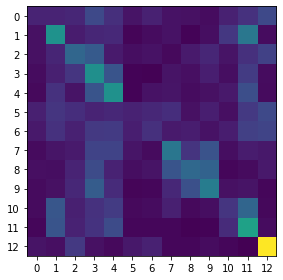

In [13]:
# Test CNN
# load best model
best_path = 'best_cnn_adam.pth'
model = torch.load(best_path)

# evaluate on test set
model = model.eval()

test_loss_arr = []
with torch.no_grad():
    epoch_test_loss = 0
    acc = 0
    pre = 0
    recall = 0
    f1 = 0
    conf_matrix = np.zeros((13,13))
#   iterate over test batches
    for loaded_data in test_loader_cnn:
        input_data, label = loaded_data
        input_data = input_data.to('cuda',dtype=torch.float32)
        label = label.to('cuda',dtype=torch.long)

        input_data = input_data.permute(0, 3, 1, 2)
        test_output = model(input_data.float())
        test_loss = criterion(test_output,label)
        
        epoch_test_loss += test_loss/ len(test_loader_cnn)
        test_output = (test_output.argmax(dim=1)).long()
        label = np.array(label.cpu())
        test_output = np.array(test_output.cpu())
        #   get confusion matrix
        if(confusion_matrix(label, test_output).shape==(13,13)):
            conf_matrix += confusion_matrix(label, test_output) / len(test_loader_cnn)
#         conf_matrix.append(confusion_matrix(label, test_output))
        #   calculate accuracy
        acc += accuracy_score(label, test_output) / len(test_loader_cnn)
        #   calculate precision
        pre += precision_score(label, test_output, average='macro', zero_division=1) / len(test_loader_cnn)
        #   calculate recall
        recall += recall_score(label, test_output, average='macro', zero_division=1) / len(test_loader_cnn)
        #   calculate F1 score
        f1 += f1_score(label, test_output, average='macro') / len(test_loader_cnn)

test_loss_arr.append(epoch_test_loss)
test_loss_arr = np.array(test_loss_arr, dtype='float')
losses = np.mean(test_loss_arr)

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.show()

By looking at accuracy plots of training and validation sets, it could be said that CNN has higher accuracy than MLP for validation. Similar results as in the “sgd” optimizer are obtained for the training plots. For the test results of the best model, it could be said that CNN gave better results than MLP model for all metrics except precision with small difference. 
By looking at the confusion matrixes, MLP is over-fitted to the breed “9” and CNN learned all breeds expect “0, 5, 6”. Light colors, refers for higher repetition, can be seen in diagonal matrix of the CNN model. 
Both models have same number of layers. In general CNN is more complex than MLP since CNN has convolution and max pooling layers. Test results’ confusion matrix of “adam” and “sgd” optimizer, it could be said that “adam” optimizer make better predictions than “sgd”. For MLP, since the “adam” optimizer is over fitted, “sgd” gave better results but it should not be general interpretation. For a differently shuffled dataset “adam” optimizer may not over-fit. To sum up, since CNN is a better model than MLP and it gave better results with the “adam” optimizer, I would prefer “adam” optimizer.